STEP1:Data Collection

In [11]:
import pandas as pd


data = pd.read_csv('Customer_Segmentation_Analysis.csv') 
print(data.head())


    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

STEP2:Data Exploration and Cleaning

In [13]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: fill with mean/median or drop rows)
data.fillna(data.mean(), inplace=True)  # Replace missing numerical values with the mean
# Or, alternatively, drop rows with missing values:
# data.dropna(inplace=True)

# Check for duplicates
print(data.duplicated().sum())

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Summary of data
print(data.describe())


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

STEP3:Descriptive Statistics & Customer Segmentation

In [15]:
# Calculate total spending (sum of all spending columns)
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate the average purchase value
average_purchase_value = data['Total_Spending'].mean()

# Frequency of purchases (sum of different purchase types)
purchase_frequency = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1).mean()

print(f"Average Purchase Value: {average_purchase_value}")
print(f"Average Frequency of Purchases: {purchase_frequency}")


Average Purchase Value: 607.7110341415141
Average Frequency of Purchases: 14.897575457694211


STEP4:Visualization

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering (you can adjust these based on the insights from data exploration)
features = ['Total_Spending', 'NumWebVisitsMonth', 'Recency', 'Age']

# Standardizing the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# K-means clustering (using 4 clusters as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_features)

# Display the first few rows with the assigned segments
print(data[['Total_Spending', 'NumWebVisitsMonth', 'Recency', 'Segment']].head())


   Total_Spending  NumWebVisitsMonth  Recency  Segment
0            1617                  7       58        1
1              27                  5       38        1
2             776                  4       26        1
3              53                  6       26        0
4             422                  5       94        3


STEP5:Insights and Recommendations

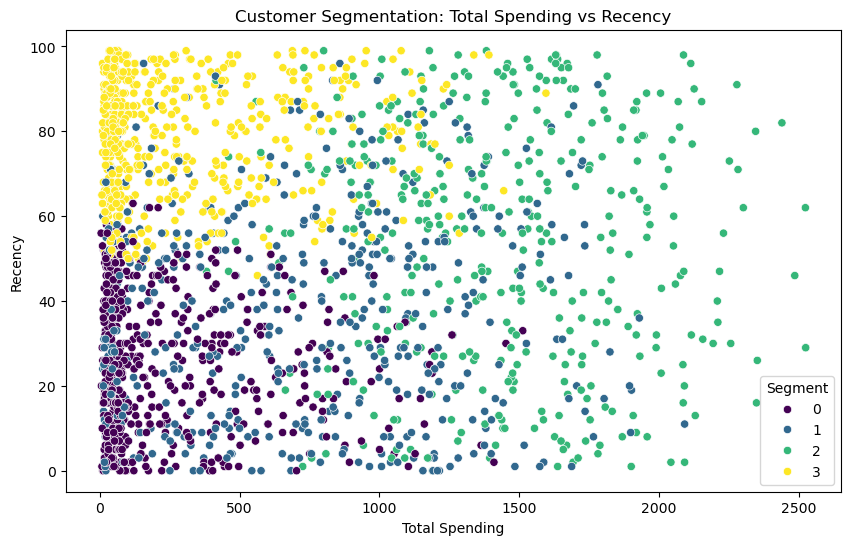

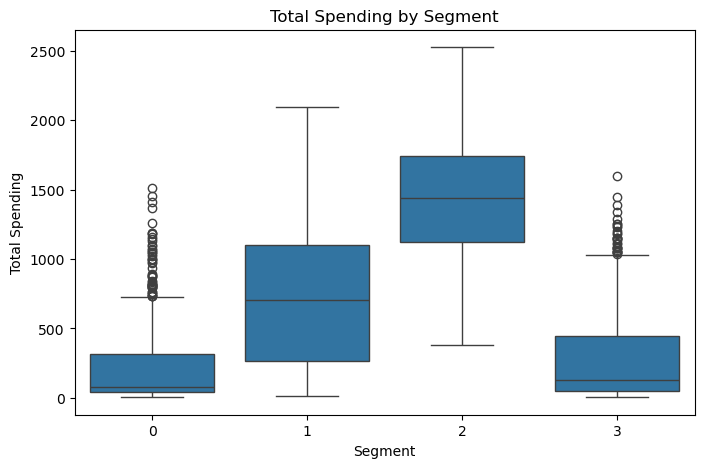

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of segments based on Total Spending vs Recency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total_Spending', y='Recency', hue='Segment', palette='viridis')
plt.title('Customer Segmentation: Total Spending vs Recency')
plt.xlabel('Total Spending')
plt.ylabel('Recency')
plt.legend(title='Segment')
plt.show()

# Plotting the average total spending for each segment
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Segment', y='Total_Spending')
plt.title('Total Spending by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Spending')
plt.show()


In [21]:
# Analyze the average spending and behavior for each segment
segment_summary = data.groupby('Segment').agg({
    'Total_Spending': ['mean', 'std'],
    'NumWebVisitsMonth': 'mean',
    'Recency': 'mean',
    'Age': 'mean'
}).reset_index()

print(segment_summary)



  Segment Total_Spending             NumWebVisitsMonth    Recency        Age
                    mean         std              mean       mean       mean
0       0     229.795775  290.210968          6.684859  26.036972  44.220070
1       1     718.134454  505.811047          4.607143  37.193277  64.909664
2       2    1440.526829  428.291712          2.758537  53.936585  47.190244
3       3     291.379189  327.436050          6.476190  77.920635  49.287478
